In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [44]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [45]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## AccountWeeks
number of weeks customer has had active account
## ContractRenewal
1 if customer recently renewed contract, 0 if not
## DataPlan
1 if customer has data plan, 0 if not
## DataUsage
gigabytes of monthly data usage
## CustServCalls
number of calls into customer service
## DayMins
average daytime minutes per month
## DayCalls
average number of daytime calls
## MonthlyCharge
average monthly bill
## OverageFee
largest overage fee in last 12 months

In [46]:
# Split data for train and test
# Feature Scaling

In [47]:
scaler = StandardScaler().fit(df.drop("Churn",axis=1))

In [48]:
X = scaler.transform(df.drop("Churn",axis=1))
y = df["Churn"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20,random_state=0)

In [50]:
X_train

array([[-0.52905206,  0.32758048, -0.61839626, ..., -0.56657365,
        -0.87226785, -0.33577659],
       [-1.83505538,  0.32758048, -0.61839626, ..., -0.8101261 ,
        -0.77366142, -0.04918418],
       [ 0.47556588,  0.32758048, -0.61839626, ..., -0.01858065,
        -1.00242835, -0.22830444],
       ...,
       [-0.20255123, -3.05268496, -0.61839626, ..., -0.87101421,
         0.37017323,  0.30905634],
       [-0.25278213,  0.32758048, -0.61839626, ..., -0.20124498,
         0.75671046, -0.12083228],
       [ 0.72672036, -3.05268496, -0.61839626, ...,  0.71207669,
         3.21003857,  2.38685135]])

In [51]:
X_test

array([[-0.22766668, -3.05268496, -0.61839626, ...,  0.16408369,
        -0.78943845, -0.33577659],
       [ 0.27464229,  0.32758048,  1.6170861 , ...,  0.2249718 ,
        -0.85649082, -0.08500823],
       [-0.80532199,  0.32758048, -0.61839626, ..., -0.08555757,
         0.31100937,  0.81059307],
       ...,
       [-0.72997565,  0.32758048, -0.61839626, ..., -0.87101421,
        -1.35346726,  0.55982471],
       [-0.17743578, -3.05268496, -0.61839626, ..., -0.68834987,
         2.74067194, -0.83731332],
       [-2.38759525,  0.32758048, -0.61839626, ..., -0.26213309,
        -0.96298577, -0.29995254]])

In [52]:
# Functions for models

In [53]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,accuracy_score,confusion_matrix
def Model(model):
    global X,y,X_train, X_test, y_train, y_test
    print(type(model).__name__)
    pred = model.predict(X_test)
    acs = accuracy_score(y_test,pred)
    print("Accuracy Score             :",acs)
    
    plot_confusion_matrix(model,X,y,cmap="Reds")
    plt.title("Confusion Matrix")
    plt.show()

In [54]:
def Check(list_of_disp):
    ax = plt.gca()
    for i in list_of_disp: 
        i.plot(ax=ax)
    plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
    plt.title("ROC Curve of Classifiers")
    plt.show()

In [55]:
from sklearn.model_selection import cross_val_score
def CrossValidationScore(model_list):
    global X,y
    
    mean_cross_val_score = []
    model_name           = []
    
    for model in model_list:
        model_name.append(type(model).__name__)
        
    for i in model_list:
        scores = cross_val_score(i, X, y, cv=5)
        mean_cross_val_score.append(scores.mean())
        
    cvs = pd.DataFrame({"Model Name":model_name,"CVS":mean_cross_val_score})
    return cvs.style.background_gradient("Greens")

In [56]:
def Predict(model,AccountWeeks,
           ContractRenewal,
           DataPlan,
           DataUsage,
           CustServCalls,
           DayMins,
           DayCalls,
           MonthlyCharge,
           OverageFee,
           RoamMins):
    result = model.predict([[AccountWeeks,
           ContractRenewal,
           DataPlan,
           DataUsage,
           CustServCalls,
           DayMins,
           DayCalls,
           MonthlyCharge,
           OverageFee,
           RoamMins]])
    print("Churn:",result[0])

In [57]:
# Model

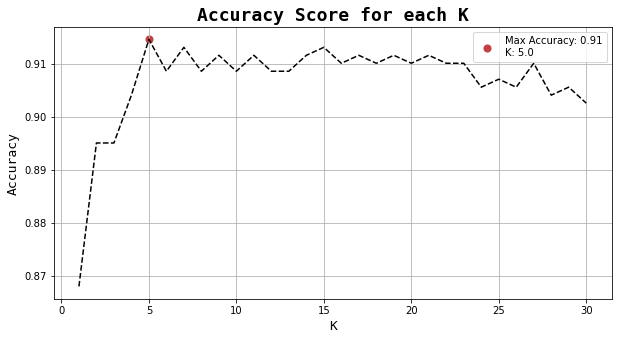

In [72]:
# Model KNN
k_max = 30
acc = [[],[]]
for k in range(1,k_max+1):
    mdl = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    pred = mdl.predict(X_test)
    acc[0].append(k)
    acc[1].append(accuracy_score(y_test, pred)) 
acc = np.array(acc)
max_acc_k = acc[1].argmax()
plt.figure(figsize=(10,5))
plt.plot(acc[0],acc[1], color='k', ls="--")
plt.scatter(x=acc[0][max_acc_k], y=acc[1][max_acc_k],s=50, label="Max Accuracy: {}\nK: {}".format(round(acc[1][max_acc_k],2),
                                                                                                  
acc[0][max_acc_k]), color='#c24040')
plt.legend()
plt.grid(True)
plt.title("Accuracy Score for each K" , size=18, fontweight='bold', fontfamily='monospace')
plt.xlabel("K", size=13, fontweight='light', fontfamily='monospace')
plt.ylabel('Accuracy', size=13, fontweight='light', fontfamily='monospace')
plt.show()

In [73]:
# Model KNN

Model Installed!
Please Wait for Results..
KNeighborsClassifier
Accuracy Score             : 0.9145427286356822


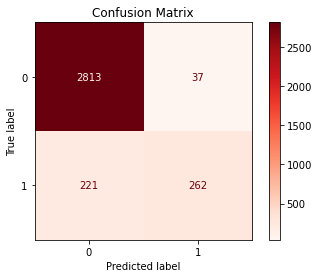

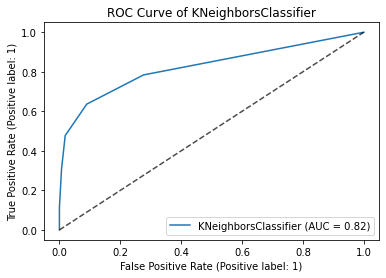

In [60]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
print("Model Installed!")
print("Please Wait for Results..")
Model(knn)

knn_disp = plot_roc_curve(knn, X_test, y_test)
plt.title("ROC Curve of {}".format(type(knn).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

In [74]:
# Model random forest

Model Installed!
Please Wait for Results..
RandomForestClassifier
Accuracy Score             : 0.9370314842578711


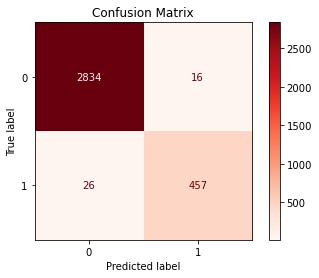

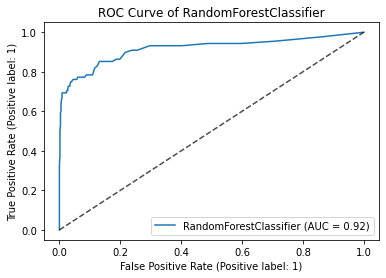

In [62]:
rfc = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
print("Model Installed!")
print("Please Wait for Results..")
Model(rfc)

rfc_disp = plot_roc_curve(rfc, X_test, y_test)
plt.title("ROC Curve of {}".format(type(rfc).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

In [75]:
# Model DecisionTree

Model Installed!
Please Wait for Results..
DecisionTreeClassifier
Accuracy Score             : 0.9220389805097451


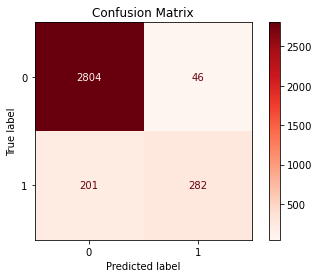

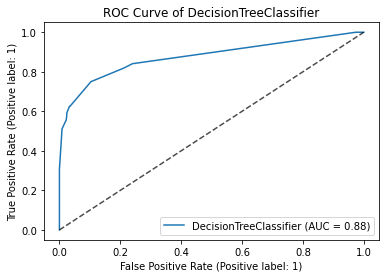

In [64]:
clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
clfd.fit(X_train, y_train)

print("Model Installed!")
print("Please Wait for Results..")
Model(clfd)

clfd_disp = plot_roc_curve(clfd, X_test, y_test)
plt.title("ROC Curve of {}".format(type(clfd).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show() 


In [65]:
## Evaluation

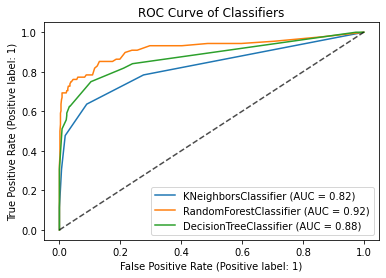

In [66]:
list_of_disp = [knn_disp,rfc_disp,clfd_disp]
Check(list_of_disp)

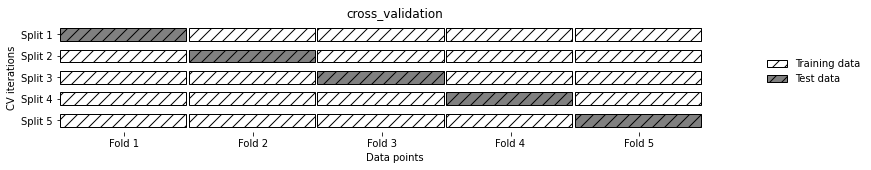

In [67]:
# CROSS VALIDATION SCORE
mglearn.plots.plot_cross_validation();
plt.show();

In [68]:
model_list = [knn, rfc, clfd]
cros_val_df = CrossValidationScore(model_list)
cros_val_df

,Model Name,CVS
0,KNeighborsClassifier,0.903088
1,RandomForestClassifier,0.936996
2,DecisionTreeClassifier,0.921394


In [69]:
index1 = np.array (['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins'])
df_feature_importance = pd.DataFrame(rfc.feature_importances_, index = index1,
                                    columns = ['feature importance']).sort_values('feature importance',
                                                                                 ascending = False)
df_feature_importance


,feature importance
DayMins,0.197640
MonthlyCharge,0.171118
CustServCalls,0.139437
OverageFee,0.103207
RoamMins,0.092299
DataUsage,0.074713
ContractRenewal,0.070117
DayCalls,0.062994
AccountWeeks,0.062787
DataPlan,0.025688


In [70]:
# Dari hasil feature important, ada 4 colom yang mempengaruhi churn
## DayMins  
## MonthlyCharge
## CustSeervCalls
## OverageFee

# Conclusion
- Mengoptimalkan harga waktu bicara (DayMins)
- Mempertahankan biaya bulanan atau memberi diskon kepada pelanggan, agar pelanggan tetap no churn (MonthlyCharge)
- Tingkatkan atau pertahankan pelayanan service, karena cutumer yang bertanya atau memanfaatkan pelayanan, sangat rentan terhadap churn (CustServCalls)




